In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.text_cell_render.rendered_html{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:19pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<font size="5" color="red">ch3. 분류분석</font>
# 1절. 분류분석 개요

- scikit-learn 공식 사이트 : http://scikit-learn.org
- scikit-learn 도큐먼트 : http://scikit-learn.org/stable

``` pip install scikit-learn```

## 1-1 tensorflow(DL)나 scikit-learn(ML) 샘플용 데이터 셋 접근방법

### load 계열(패키지 내 데이터를 갖고 있음)

### fetch 계열(패키지가 데이터를 갖고 있지 않고 함수 호출시 인터넷 다운)

### make 계열
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성

In [3]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

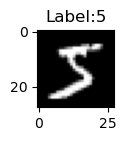

In [4]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label:{y_train[0]}')
plt.show()

In [7]:
# fetch 계열
from sklearn.datasets import fetch_openml #iris, mnist, wine, fashion-MNIST
import numpy as np
mnist = fetch_openml(name='mnist_784', parser='auto', version=1, as_frame=False)

In [9]:
X, y = mnist.data, mnist.target.astype(np.uint8) # y는 unsigned int로 변환
X.shape, y.shape

((70000, 784), (70000,))

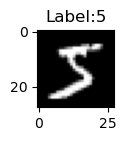

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(f'Label:{y[0]}')
plt.show()

In [13]:
iris = fetch_openml(name='iris', version=1)
X, y = iris.data, iris.target
y[0]

'Iris-setosa'

# 2절. 분류분석의 종류(pt 8)
## 2-1 확률적 모형

## 2-2 판별함수 모형